인공지능의 이해
MLP -
순전파, 역전파, 노드, W, X , 입력층, 출력층, 은닉층

비선형성(활성화함수)
- relu(swift, gelu,elu 기타등등), sigmoid, softmax, tanh,

역전파 끝에 예측값(y^) , 실제 정답값(y)

loss fuction - mse , mae, accuracy, cross entropy,

과적합 :  모델이 새로운 데이터를 받았을 때 기존 학습에 너무 적합하게 되어 예측을 잘 못함

1. 배치 정규화
2. 드랍아웃
3. L1, L2
4. Data Augmentation
-----------------------------------------------------------------------------

MLP f(x,thata) - CNN (이미지처리에 특화)  
- One Stage Detection(SSD - Yolo ~ YoloX)
- Two Stage Detection(backbone -(Alexnet, ResNet, Lenet, Inception)) - RCNN , fast RCNN, fasterRCNN

-> Vit???????? conductive bis
-------------------------------------------------------
NLP
RNN(sequence) - LSTM - GRU / (Encoder-Decoder)/Attention / Transformer(Attention is all need to you)








----

### 1) 언어 모델(Language Model)이란?

언어 모델이란 문장과 같은 단어 시퀀스에서 각 단어의 확률을 계산하는 모델입니다.<br/>
이전 시간에 배운 **`Word2Vec`** 역시 여러 가지 언어 모델 중 하나입니다.<br/>
**`CBoW`** 에서는 주변 단어의 정보를 바탕으로 타겟 단어의 확률을 할당했습니다.

익숙하지 않을 수 있겠지만 수식으로 먼저 생각해보겠습니다.<br/>
$l$개의 단어로 구성된 문장은 아래와 같이 나타낼 수 있겠습니다.

> $w_1, w_2, w_3, ..., w_l$

`CBoW`가 타겟 단어(target word)를 예측할 확률 $P(w_t)$ 은 아래와 같이 구해집니다.

> $P(w_t \vert w_{t-2},w_{t-1},w_{t+1},w_{t+2})$

수식이 익숙하지 않을 수 있으니 예시로 한 번 더 살펴보겠습니다.

위 언어 모델을 사용하여 "I am a student" 라는 문장이 만들어질 확률을 구하면 아래와 같습니다.

> $P(\text{"I","am","a","student"}) = P(\text{"I"}) \times P(\text{"am"} \vert \text{"I"}) \times P(\text{"a"} \vert \text{"I","am"}) \times P(\text{"student"} \vert \text{"I","am","a"})$

앞 단어 들이 등장했을 때 특정 단어가 등장할 확률을 조건부 확률로 구하게 됩니다.<br/>
언어 모델을 잘 나타내는 영상 하나 보고 가도록 하겠습니다.

### 2) 통계적 언어 모델 (Statistical Language Model, SLM)

통계적 언어 모델은 신경망 언어 모델이 주목받기 전부터 연구되어 온 전통적인 접근 방식입니다.


- **통계적 언어 모델의 확률 계산**

통계적 언어 모델에서는 단어의 등장 횟수를 바탕으로 조건부 확률을 계산합니다.

다시 _"I am a student"_ 라는 문장을 만드는 예시를 생각해보겠습니다.

> $P(\text{"I","am","a","student"}) = P(\text{"I"}) \times P(\text{"am"} \vert \text{"I"}) \times P(\text{"a"} \vert \text{"I","am"}) \times P(\text{"student"} \vert \text{"I","am","a"})$

첫 번째 항인 $P(\text{"I"})$ 를 구해봅시다. <br/> 전체 말뭉치의 문장 중에서 시작할 때 _"I"_ 로 시작하는 문장의 횟수를 구합니다. 전체 말뭉치의 문장이 1000개이고, 그 중 _"I"_ 로 시작하는 문장이 100개라면

> $$P(\text{"I"}) = \frac{100}{1000} = \frac{1}{10}$$

다음으로, _"I"_ 로 시작하는 100개의 문장 중 바로 다음에 _"am"_ 이 등장하는 문장이 50개라면

> $$P(\text{"am"} \vert \text{"I"}) = \frac{50}{100} = \frac{1}{2}$$

이런 방식으로 모든 조건부 확률을 구한 뒤 서로를 곱해주면 문장이 등장할 확률 $P(\text{"I","am","a","student"})$ 을 구할 수 있습니다.

- **통계적 언어 모델의 한계점**

통계적 언어 모델은 횟수 기반으로 확률을 계산하기 때문에 희소성(Sparsity) 문제를 가지고 있습니다.  
 예를 들어, 학습시킬 말뭉치에 _"1 times", "2 times", ..._ 라는 표현은 등장하지만 _"7 times"_ 라는 표현은 없다고 해보겠습니다.

그렇다면 이 말뭉치를 학습한 통계적 언어 모델은 아래와 같은 문장을 절대 만들어 낼 수 없게 됩니다.

> "I studied this section 7 times"

_"7"_ 이라는 단어가 등장한 순간 바로 다음 _"times"_ 가 등장할 확률은 0이 되어버리기 때문입니다.<br/>
이렇게 실제로 사용되는 표현임에도 말뭉치에 등장하지 않았다는 이유로 많은 문장이 등장하지 못하게 되는 문제를 희소 문제라고 합니다.<br/>
통계적 언어 모델에서 이런 문제를 개선하기 위해서 N-gram 이나 스무딩(smoothing), 백오프(back-off)와 같은 방법이 고안되었습니다.

> ❓ **더 알아보기** <br/>
> 1. N-gram : 통계적 언어 모델을 고도화 하기 위한 방법 중 하나인 N-gram에 대해 조사해봅시다.<br/>
> 2. Back-off, Smoothing : 희소 문제를 보완하기 위한 장치인 back-off 와 smoothing에 대해 알아봅시다.





### 3) 신경망 언어 모델 (Neural Langauge Model)

## 2. 순환 신경망 (RNN, Recurrent Neural Network)

인공 신경망 언어 모델에서 사용되는 순환 신경망에 대해 알아보겠습니다.

### 연속형 데이터 (Sequential Data)

- Sequential Data란?
    - 어떤 순서로 오느냐에 따라서 단위의 의미가 달라지는 데이터
    - **Non-sequential Data**

    <img src="https://www.researchgate.net/profile/Kent-Wittenburg/publication/303542822/figure/tbl1/AS:614026883117086@1523406825823/Tabular-data-used-in-examples.png" width="280"/> <img src="https://i.imgur.com/phjsn70.jpg" width="500"/>

    - **Sequential Data**

    <img src="https://pbs.twimg.com/media/CxJMPgPUsAAcaRQ?format=jpg&name=small" width="400"/> <img src="https://discourse.metabase.com/uploads/default/optimized/2X/1/1391161139879b2a39d3f7f5f013549776769c68_2_690x411.png" width="400"/>

RNN 은 연속형(Sequential) 데이터를 잘 처리하기 위해 고안된 신경망입니다.<br/>
RNN의 구조에 대해 알아보도록 하겠습니다.


### RNN의 구조

등호 왼쪽을 보면 3개의 화살표가 있습니다.

1. 입력 벡터가 은닉층에 들어가는 것을 나타내는 화살표
2. 은닉층로부터 출력 벡터가 생성되는 것을 나타내는 화살표
3. 은닉층에서 나와 다시 은닉층으로 입력되는 것을 나타내는 화살표.

3번 화살표는 기존 신경망에서는 없었던 과정입니다.<br/>
이 화살표는 특정 시점에서의 은닉 벡터가 다음 시점의 입력 벡터로 다시 들어가는 과정을 나타내고 있습니다.<br/>
출력 벡터가 다시 입력되는 특성 때문에 **'순환(Recurrent) 신경망'** 이라는 이름이 붙었습니다.

<img src="https://i.imgur.com/nFMF0Nc.png" width="900"/>

### time-step 별로 펼쳐서 RNN 알아보기



t 시점의 RNN 계층은 그 계층으로의 입력 벡터 $x_t$ 와 1개 전의 RNN 계층의 출력 벡터 $h_{t-1}$ 를 받아들입니다.<br/>
입력된 두 벡터를 바탕으로 해당 시점에서의 출력을 아래와 같이 계산합니다.

> $h_t = \tanh(h_{t-1}W_h + x_tW_x + b)$

가중치는 $W_h, W_x$ 2개가 있습니다.<br/>
각각 입력 x를 h로 변환하기 위한 $W_x$와 RNN의 은닉층의 출력을 다음 h로 변환해주는 $W_h$ 입니다.<br/>
b는 각 편향(bias)을 단순화하여 나타낸 항입니다.

이 과정을 그림으로 나타내면 다음과 같습니다.


이렇게 하면 t 시점에 생성되는 hidden-state 벡터인 $h_t$ 는 해당 시점까지 입력된 벡터 $x_1, x_2, \cdots, x_{t-1}, x_t$ 의 정보를 모두 가지고 있습니다.<br/>
Sequential 데이터의 순서 정보를 모두 기억하기 때문에 Sequential 데이터를 다룰 때 RNN을 많이 사용합니다.

In [ ]:
import numpy as np

In [ ]:
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        #필요한 가중치를 초기화
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache =None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t  = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

### 다양한 형태의 RNN

실제로 다양한 형태의 RNN이 있습니다. 아래 그림에서 가장 왼쪽에 위치한 one-to-one은 실질적으로 순환이 적용되지는 않은 형태입니다.<br/>
나머지 4개의 RNN이 각각 어떤 분야에 사용되는지 알아보겠습니다.

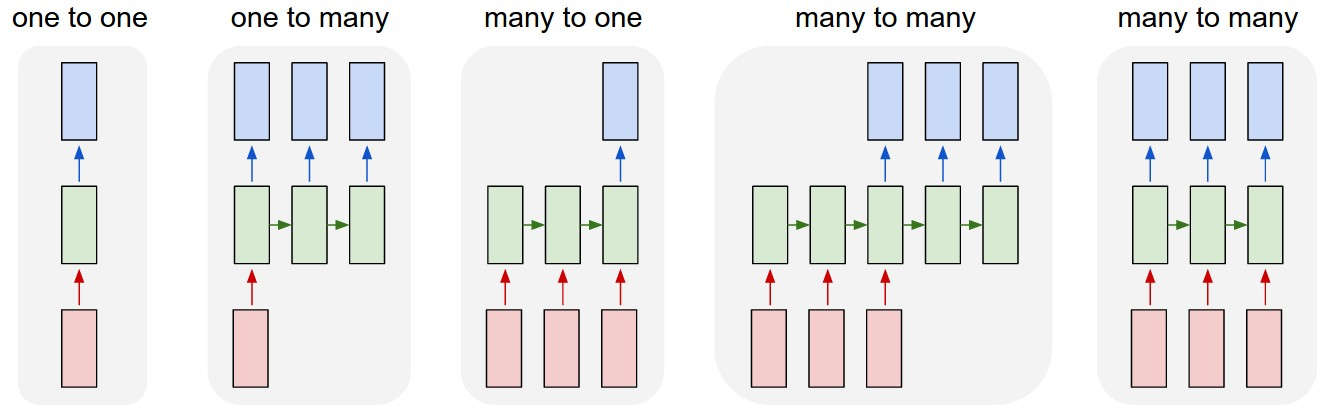

1. one-to-many : 1개의 벡터를 받아 Sequential한 벡터를 반환합니다.  
 이미지를 입력받아 이를 설명하는 문장을 만들어내는 **이미지 캡셔닝(Image captioning)**에 사용됩니다.
2. many-to-one : Sequential 벡터를 받아 1개의 벡터를 반환합니다.   
문장이 긍정인지 부정인지를 판단하는 **감성 분석(Sentiment analysis)**에 사용됩니다.
3. many-to-many(1) : Sequential 벡터를 모두 입력받은 뒤 Sequential 벡터를 출력합니다.  
 **시퀀스-투-시퀀스(Sequence-to-Sequence, Seq2Seq) 구조**라고도 부릅니다.  
  번역할 문장을 입력받아 번역된 문장을 내놓는 **기계 번역(Machine translation)**에 사용됩니다.
4. many-to-many(2) : Sequential 벡터를 입력받는 즉시 Sequential 벡터를 출력합니다.  
 **비디오를 프레임별로 분류(Video classification per frame)**하는 곳에 사용됩니다.

# RNN 모델의 장점 과 단점

- 이론적으로 어떤 길이의 Seqeuntial Data 를 처리할 수 있다는 장점
- 주식시장 예측 같은 TASK로 봤을때, 과거정보 보다 근래 정보가 최종 아웃풋에 영향을 많이 미친다


RNN의 단점
- 최종 아웃풋에 근래 정보가 많이 영향을 미친다.
- *병렬화가 어렵다, 순차적으로 데이터가 입력이 된가 (트릭은 있음)
- *기울기 소실, 기울기 폭발 같은 문제들이 여전히 있다.

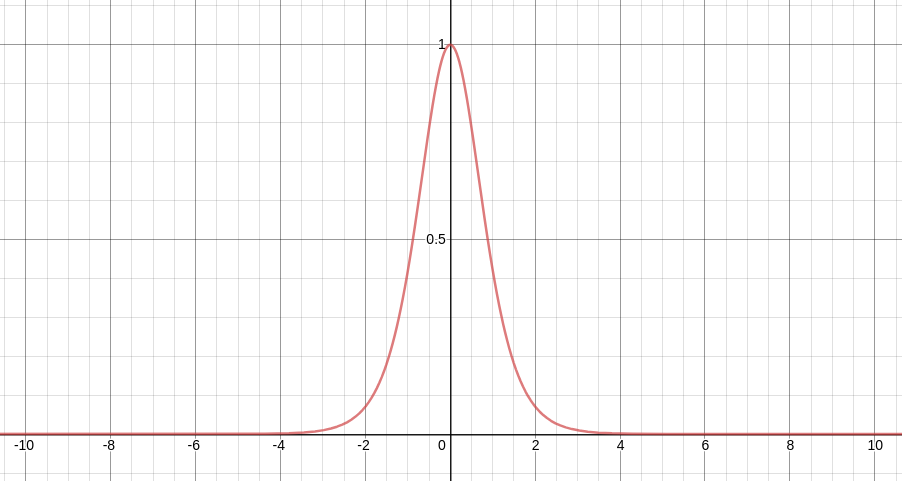

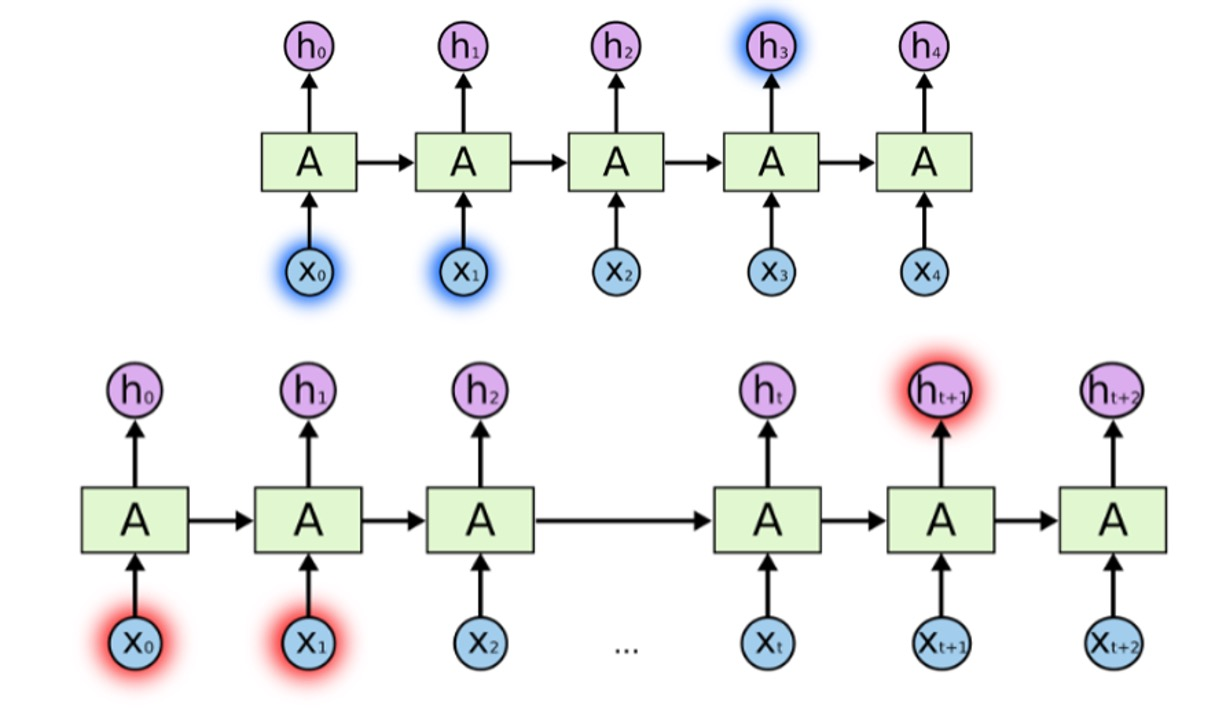

-----
# 단어를 분산 표현(Distributed Representation)으로 나타내기

## 분포가설
> 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다

예를 들어, 두 문장

- I found **good** stores.
- I found **beautiful** stores.

에서 _"**good** 과 **beautiful** 은 해당 단어 주변에 분포한 단어가 유사하기 때문에 비슷한 의미를 지닐 것이다"_ 라고 가정하는 것이 분포 가설입니다.

바로 이 분포 가설에 기반하여 주변 단어 분포를 기준으로 단어의 벡터 표현이 결정되기 때문에 **<font color="ff6f61">분산 표현(Distributed representation)</font>**이라고 부르게 됩니다.

1) 원핫인코딩

원-핫 인코딩은 단어를 벡터화하고자 할 때 선택할 수 있는 가장 쉬운 방법입니다. <br/>
표 형태로 된 데이터를 다룰 때 범주형 변수를 요소마다 [0 0 0 1 ...] 의 형태로 나타냈던 것과 동일한 방법을 사용합니다.

> "I am a student"

라는 문장에서 각 단어를 원-핫 인코딩으로 나타내면 다음과 같습니다.

> I : [1 0 0 0] <br/>
> am : [0 1 0 0] <br/>
> a : [0 0 1 0] <br/>
> student : [0 0 0 1]

In [ ]:
sent = "I am a student"

word_list = sent.split()

word_dict = {}

for idx, word in enumerate(word_list):
    vec = [0 for _ in range(len(word_list))]
    vec[idx] = 1
    word_dict[word] = vec

print(word_dict)

{'I': [1, 0, 0, 0], 'am': [0, 1, 0, 0], 'a': [0, 0, 1, 0], 'student': [0, 0, 0, 1]}


원핫인코딩에는 직관적으로 이해할 수 있지만, 유사도를 구할 수 없다.

# 코사인 유사도


$$
\large \text{Cosine similarity} = \frac{\vec{a} \cdot \vec{b} }{\vert \vec{a} \vert \vert \vec{b} \vert }
$$

In [ ]:
import numpy as np

def cos_sim(a, b):
    arr_a = np.array(a)
    arr_b = np.array(b)

    result = np.dot(arr_a, arr_b) / (np.linalg.norm(arr_a) * np.linalg.norm(arr_b))

    return result

In [ ]:
print(cos_sim(word_dict['I'], word_dict['student']))

0.0


원핫인코딩으로는 단어간에 유사도를 알 수 가 없다!!!

----

2) 임베딩(Embedding)

원-핫 인코딩의 단점을 해결하기 위해 등장한 것이 **<font color="ff6f61">임베딩(Embedding)</font>**입니다. <br/>
단어를 고정 길이의 벡터, 즉 차원이 일정한 벡터로 나타내기 때문에 '임베딩'이라는 이름이 붙었습니다.<br/>
임베딩을 거친 단어 벡터는 원-핫 인코딩과는 다른 형태의 값을 가집니다.

예를 들어,

> [0.04227, -0.0033, 0.1607, -0.0236, ...]

위와 같이 벡터 내의 각 요소가 연속적인 값을 가지게 됩니다.<br/>
어떻게 이런 벡터가 만들어지는지, 가장 널리 알려진 임베딩 방법인 **`Word2Vec`** 를 통해 알아보도록 하겠습니다.

> ❗️ ***임베딩은 자연어처리 이외에 다른 딥러닝 분야(추천 시스템, GNN 등)에서도 사용되니 잘 기억해두도록 합시다. :)***

2013년에 고안된 **<font color="ff6f61">Word2Vec</font>** 은 말 그대로 **단어를 벡터로(Word to Vector) 나타내는 방법**으로 가장 널리 사용되는 임베딩 방법 중 하나입니다.<br>
**`Word2Vec`**은 특정 단어 양 옆에 있는 두 단어(window size = 2)의 관계를 활용하기 때문에 **분포 가설을 잘 반영**하고 있습니다.

`Word2Vec` 에는 `CBoW`와 `Skip-gram`의 2가지 방법이 있습니다.<br/>
두 가지 방법이 어떻게 다른지에 대해서 알아보도록 하겠습니다.

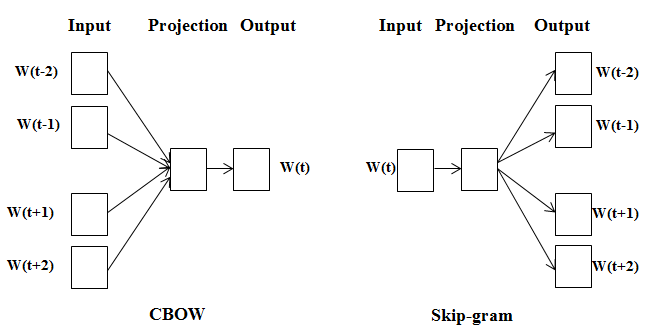

`CBoW`와 `Skip-gram`의 차이는

1. 주변 단어에 대한 정보를 기반으로 중심 단어의 정보를 예측하는 모델인지 ▶️ **<font color="ff6f61">CBoW(Continuous Bag-of-Words)</font>**
2. 중심 단어의 정보를 기반으로 주변 단어의 정보를 예측하는 모델인지 ▶️ **<font color="ff6f61">Skip-gram</font>**

예시를 통해서도 둘의 차이를 알아보겠습니다.<br/>
<별 헤는 밤> 의 일부분에 형태소 분석기를 적용하여 토큰화한 것입니다.

> “… 어머님 나 는 별 하나 에 아름다운 말 한마디 씩 불러 봅니다 …”

**CBoW** 를 사용하면 표시된 단어 정보를 바탕으로 아래의 [ ---- ] 에 들어갈 단어를 예측하는 과정으로 학습이 진행됩니다.

> “… 나 는 [ -- ] 하나 에 … “ <br/>
> “… 는 별 [ ---- ] 에 아름다운 …”<br/>
> “… 별 하나 [ -- ] 아름다운 말 …”<br/>
> “… 하나 에 [ -------- ] 말 한마디 …”

**Skip-gram** 을 사용하면 표시된 단어 정보를 바탕으로 다음의 [ ---- ] 에 들어갈 단어를 예측하는 과정으로 학습이 진행됩니다.

> “… [ -- ] [ -- ] 별 [ ---- ] [ -- ] …” <br/>
> “… [ -- ] [ -- ] 하나 [ -- ] [ -------- ] …” <br/>
> “… [ -- ] [ ---- ] 에 [ -------- ] [ -- ] …” <br/>
> “… [ ---- ] [ -- ] 아름다운 [ -- ] [ ------ ] …”

더 많은 정보를 바탕으로 특정 단어를 예측하기 때문에 CBoW의 성능이 더 좋을 것으로 생각하기 쉽지만,<br/>
역전파 관점에서 보면 Skip-gram에서 훨씬 더 많은 학습이 일어나기 때문에 **Skip-gram의 성능이 조금 더 좋게 나타납니다.**<br/>
물론 계산량이 많기 때문에 Skip-gram에 드는 리소스가 더 큰 것도 사실입니다.

---

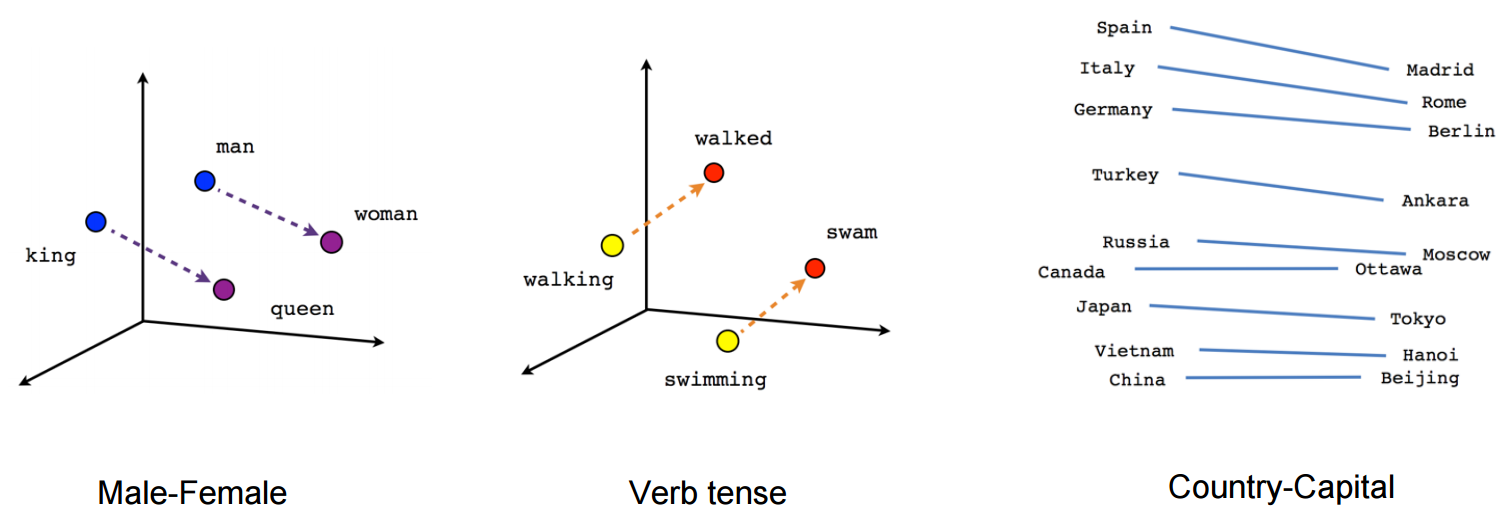

Word2Vec을 통해 얻은 임베딩 벡터는 **<font color="ff6f61">단어 간의 의미적, 문법적 관계를 잘 나타냅니다.</font>**<br/>
이를 대표적으로 잘 보여주는 것이 아래 그림입니다.<br/>

1. **`man - woman`** 사이의 관계와 **`king - queen`** 사이의 관계가 매우 유사하게 나타납니다.<br/>
생성된 임베딩 벡터가 단어의 **의미적(Semantic) 관계를 잘 표현**하는 것을 확인할 수 있습니다.

2. **`walking - walked`** 사이의 관계와 **`swimming - swam`** 사이의 관계가 매우 유사하게 나타납니다.<br/>
생성된 임베딩 벡터가 단어의 **문법적(혹은 구조적, Syntactic)인 관계도 잘 표현**하는 것을 확인할 수 있습니다.

3. 고유명사에 대해서도 나라 - 수도 와 같은 관계를 잘 나타내고 있는 것을 확인할 수 있습니다.

In [ ]:
!pip install gensim --upgrade

In [ ]:
import gensim

In [ ]:
gensim.__version__

'4.3.3'

구글 뉴스 말뭉치로 학습된 `word2vec` 벡터 다운로드


In [73]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [74]:
for idx, word in enumerate(wv.index_to_key):
    if idx == 10:
        break

    print(f"word #{idx}/ {len(wv.index_to_key)} is '{word}")

"word #0/ 3000000 is '</s>"
"word #1/ 3000000 is 'in"
"word #2/ 3000000 is 'for"
"word #3/ 3000000 is 'that"
"word #4/ 3000000 is 'is"
"word #5/ 3000000 is 'on"
"word #6/ 3000000 is '##"
"word #7/ 3000000 is 'The"
"word #8/ 3000000 is 'with"
"word #9/ 3000000 is 'said"


In [75]:
vec_king = wv['king']

In [76]:
print(vec_king.shape)

(300,)


In [77]:
print(vec_king)

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

없는단어를 불렀을떄,

In [78]:
unk = 'cameroon'

wv[unk]

KeyError: "Key 'cameroon' not present"

cameroon 이라는 단어가 없기 때문에, 키에러가 발생, 없는단어는 표현할 수 없음

단어 간에 유사도 파악

In [79]:
pairs = [
    ('car', 'minivan'),
    ('car', 'bicycle'),
    ('car', 'airplane'),
    ('car', 'cereal'),
    ('car', 'communism')
]

In [80]:
for w1, w2 in pairs:
    print(f'{w1} === {w2}\t {wv.similarity(w1, w2)}')

'car === minivan\t 0.6907036900520325'
'car === bicycle\t 0.5364484190940857'
'car === airplane\t 0.42435577511787415'
'car === cereal\t 0.13924746215343475'
'car === communism\t 0.05820293352007866'


------

# Word2Vec - CBOW

라이브러리 import

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import defaultdict

In [82]:
data = [
    ('king', 'kingdom'), ('king', 'palace'), ('queen', 'royal'),
    ('queen', 'palace'), ('apple', 'fruit'), ('banana', 'fruit'),
    ('apple', 'red'), ('banana', 'yellow'), ('car', 'vehicle'),
    ('bike', 'vehicle'), ('car', 'engine'), ('bike', 'wheel'),
    ('sun', 'star'), ('moon', 'satellite'), ('sun', 'light'),
    ('moon', 'light'), ('water', 'liquid'), ('ice', 'solid'),
    ('water', 'drink'), ('ice', 'cold'), ('cat', 'animal'),
    ('dog', 'animal'), ('cat', 'feline'), ('dog', 'canine'),
    ('coffee', 'beverage'), ('tea', 'beverage'), ('coffee', 'hot'),
    ('tea', 'hot'), ('book', 'read'), ('magazine', 'read')
]

In [83]:
word2index = {}
index2word = {}
idx = 0

for word1, word2 in data:
  for word in [word1, word2]:
    if word not in word2index:
      word2index[word] = idx
      index2word[idx] = word
      idx += 1

In [84]:
# vocab size
V = len(word2index)
# hidden layer size
N = 5
learning_rate = 0.1
epochs = 600

# 모델 가중치 초기화

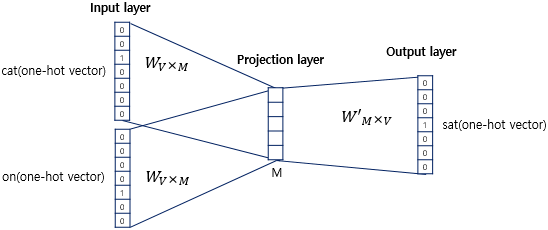

In [85]:
W1 = np.random.randn(V, N) * 0.01 # 인풋 히든
W2 = np.random.randn(N, V) * 0.01 # 아웃풋 히든

In [86]:
def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

In [90]:
losses = []

for epoch in range(epochs):
    loss = 0

    for target, context in data:

        # 순전파
        x = np.zeros(V)
        x[word2index[target]]= 1
        h = np.dot(W1.T, x)
        u = np.dot(W2.T, h)
        y_pred = softmax(u)

        # 역전파
        y_true = np.zeros(V)
        y_true[word2index[context]] = 1
        e = y_pred - y_true
        loss += -np.log(y_pred[word2index[context]])



        dLdW2 = np.outer(h, e)
        dLdW1 = np.outer(x, np.dot(W2, e.T))

        W1 -= learning_rate * dLdW1
        W2 -= learning_rate * dLdW2


    losses.append(loss)

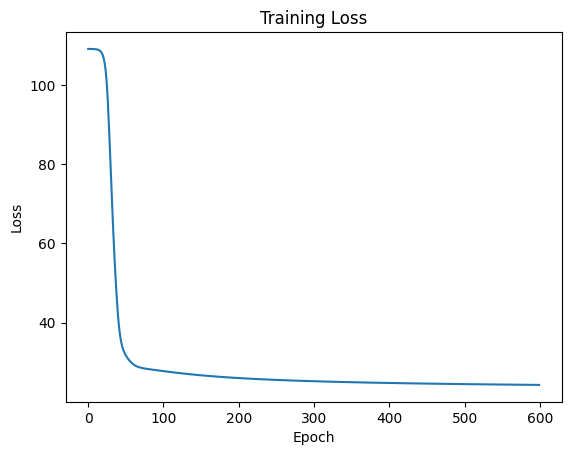

In [88]:
# Plotting loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

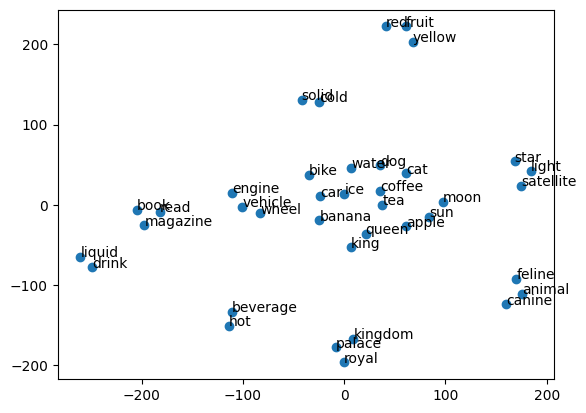

In [91]:
# Embedding visualization using t-SNE
vectors = W1 + W2.T
tsne = TSNE(n_components=2, perplexity=5)
Y = tsne.fit_transform(vectors)

plt.scatter(Y[:, 0], Y[:, 1])
for i, label in enumerate(word2index.keys()):
    plt.annotate(label, (Y[i, 0], Y[i, 1]))
plt.show()

---

## 가장 관련있는 단어를 뽑는 메서드
`.most_similar()`

In [ ]:
for i, (word, similarity) in enumerate(wv.most_similar(positive = ['car', 'minivan'], topn = 5)):
  print(f"Top {i+1} : {word}, {similarity}")

Top 1 : SUV, 0.8532192707061768
Top 2 : vehicle, 0.8175783753395081
Top 3 : pickup_truck, 0.7763688564300537
Top 4 : Jeep, 0.7567334175109863
Top 5 : Ford_Explorer, 0.7565720081329346


## 제일 관련없는 단어를 뽑는 메서드
`.doesnt_match()`

In [ ]:
wv.doesnt_match(['fire', 'water', 'land', 'car', 'air'])

'car'

---

# OOV(out of vocabulary) 문제

데이터 수집에 제법 노력을 쏟더라도 세상 모든 단어가 들어있는 말뭉치를 구하는 것은 불가능합니다.<br/>
같은 어근을 지닌 단어라도 "go, went, gone, goes..." 등 수많은 변형이 있습니다.<br/>
게다가 이전에는 쓰지 않았던 신조어가 등장하기도 합니다.

하지만 **`Word2Vec`** 은 말뭉치에 등장하지 않은 단어에 대해서는 임베딩 벡터를 만들지 못한다는 단점이 있습니다.<br/>
위에서 살펴본 것처럼 말뭉치에 등장하지 않은 단어인 Cameroon의 임베딩 벡터를 출력하려다 보니 에러가 발생했습니다.<br/>
이렇게 기존 말뭉치에 등장하지 않는 단어가 등장하는 문제를 **<font color="ff6f61">OOV(Out of Vocabulary) 문제</font>**라고 합니다.<br/>
Word2Vec은 등장하지 않는 단어에 대해서는 학습하지 않기 때문에 예측(혹은 추론) 단계에서<br/>
Cameroom과 같은 새로운 단어가 등장하면 에러를 발생시킵니다.

또한 적게 등장하는 단어(Rare words)에 대해서는 학습이 적게 일어나기 때문에 적절한 임베딩 벡터를 생성해내지 못한다는 것도 Word2Vec 의 단점입니다.

**`fastText`** 는 철자(Character) 수준의 임베딩을 보조 정보로 사용함으로써 OOV 문제를  해결해냈습니다.

예시를 생각해 보겠습니다.<br/>
"맞벌이"라는 단어를 모른다고 하더라도 아래 단어를 알면 대략적인 의미를 유추해 볼 수 있습니다.

> 1. _"맞선, 맞절, 맞대다, 맞들다, 맞바꾸다, 맞서다, 맞잡다, 맞장구치다"_ <br/>
> 2. _"벌다, 벌어, 벌고"_<br/>
> 3. _"먹이, 깊이, 넓이"_

첫 번째 줄 단어를 통해서 **"맞-"**이라는 접두사의 의미를 유추해 보고,<br/>
두 번째 줄 단어를 통해서 **"-벌-"**이라는 어근의 의미를 유추해 보고,<br/>
세 번째 줄 단어를 통해서 **"-이"**라는 접미사의 의미를 유추해 볼 수 있습니다.<br/>
세 가지를 잘 조합하면 "맞벌이" 라는 단어의 뜻을 알 수 있습니다.

**`fastText`** 가 철자 단위 임베딩을 사용하고자 하는 이유도 동일합니다.<br/>
모델이 학습하지 못한 단어더라도 잘 쪼개고 보면 말뭉치에서 등장했던 단어를 통해 유추해 볼 수 있다는 아이디어에서 출발하였습니다.

## gensim 패키지로 fastText 실습해보기

In [92]:
from pprint import pprint as print
from gensim.models import FastText
from gensim.test.utils import datapath

In [93]:
corpus_file = datapath('lee_background.cor')

In [94]:
model = FastText(vector_size = 100)

model.build_vocab(corpus_file = corpus_file)

In [95]:
model.train(
    corpus_file = corpus_file,
    epochs = model.epochs,
    total_examples = model.corpus_count,
    total_words = model.corpus_total_words
)

(164386, 301935)

In [96]:
ft = model.wv

In [ ]:
print(ft)

In [97]:
print('night' in ft.key_to_index)

True


In [98]:
print('nights' in ft.key_to_index)

False


말뭉치에 night는 있지만, 복수형인 nights는 없다.

In [99]:
ft['night']

array([-0.2316843 ,  0.17835252, -0.2242755 , -0.08657478,  0.08402805,
        0.40101355,  0.27722883,  0.49936783,  0.20331883, -0.22512776,
        0.00853008, -0.16183385, -0.22034898,  0.5624822 , -0.41136873,
       -0.54701144,  0.16536453, -0.21992056, -0.45563874, -0.5201562 ,
       -0.48567617, -0.09677508, -0.44766134, -0.15618941, -0.1830671 ,
       -0.30009842, -0.664246  , -0.10767116, -0.31958675,  0.27889058,
       -0.342311  ,  0.3412297 ,  0.8353154 , -0.28263918,  0.17892668,
        0.33537814,  0.34586054, -0.08281906, -0.3859389 , -0.30589297,
        0.48843235, -0.45756185,  0.03497027, -0.42298275, -0.5643095 ,
       -0.3102326 , -0.137296  ,  0.10934823,  0.37417698, -0.03503357,
        0.39789137, -0.43870836,  0.2845959 , -0.39519176, -0.14827494,
       -0.17560802, -0.16534398, -0.16066533,  0.00878059, -0.34090528,
       -0.3593344 , -0.45740303, -0.16146632,  0.3708294 , -0.08012865,
        0.6771089 ,  0.037416  ,  0.00921947,  0.41365418,  0.27

In [100]:
ft.similarity('night', 'nights')

0.999992

In [101]:
ft.most_similar('nights')

[('night', 0.9999919533729553),
 ('rights', 0.9999876022338867),
 ('flights', 0.9999874830245972),
 ('overnight', 0.9999872446060181),
 ('fighting', 0.9999855756759644),
 ('fighters', 0.9999853372573853),
 ('entered', 0.9999851584434509),
 ('fight', 0.9999849796295166),
 ('fighter', 0.9999848008155823),
 ('eight', 0.9999844431877136)]

In [102]:
ft.doesnt_match('night nooon fight morning'.split())

'nooon'